In [1]:
from pathlib import Path

from nilearn.interfaces.bids import get_bids_files, parse_bids_filename
from nilearn import datasets
from nilearn.maskers import NiftiMapsMasker, NiftiLabelsMasker
from nilearn import plotting
from sklearn.utils import Bunch

import pandas as pd

from connectivity.atlases import atlas_mapping


BIDSDIR = Path("/georges/memento/BIDS")
ATLAS = "difumo"

In [2]:

class Atlas(Bunch):
    @classmethod
    def from_kwargs(cls, name, soft, **atlas_kwargs) -> None:
        new = cls(**atlas_kwargs)

        new.is_soft = soft
        new.name = name
        return new
    
    @classmethod
    def from_name(cls, name, soft):
        atlas_kwargs = atlas_mapping[name]()
        new = cls(**atlas_kwargs)
        new.is_soft = soft
        new.name = name
        return new

    def get_coords(self):
        raise NotImplemented()
    
    def overlay(self):
        raise NotImplemented()

    def plot(self):
        if self.is_soft:
            return plotting.plot_prob_atlas(self.maps, title=self.name)
        else:
            return plotting.plot_roi(self.maps, title=self.name)

    # TODO test
    def fit_masker(self, **masker_kw):
        if self.is_soft:
            masker = NiftiMapsMasker(
                maps_img=self.maps,
                **masker_kw
            )
        else:
            masker = NiftiLabelsMasker(
                labels_img=self.maps
            )
        masker.fit()
        return masker
            

/homes_unix/jlegrand/miniconda3/envs/memento/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(


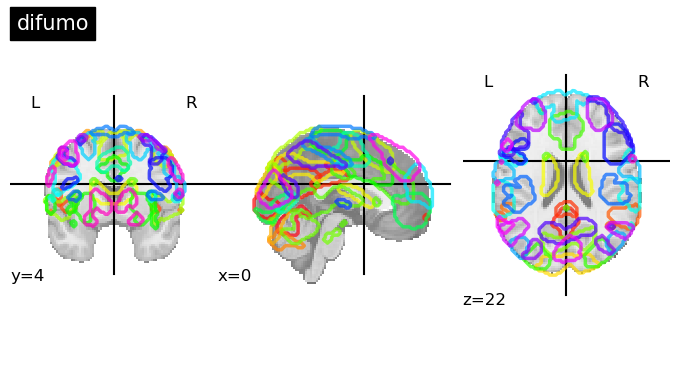

In [3]:
atlas = Atlas.from_name(ATLAS, True)
atlas.plot()

In [4]:
fmri_path = get_bids_files(
    BIDSDIR / "derivatives/fmriprep-23.2.0",
    "bold",
    modality_folder="func",
    file_type="nii.gz",
    filters=[
    #    #("space", "MNI152NLin2009cAsym")
        ("space", "MNI152NLin6Asym")
    ],
)

In [ ]:
df = pd.DataFrame(map(parse_bids_filename, fmri_path))

ses_count = df.groupby("sub")["ses"].count()

complete_subs = ses_count[ses_count == 3].index.to_list()
complete_df = df[df["sub"].isin(complete_subs)]